In [1]:
import pandas as pd
import numpy as np

Heart_disease=pd.read_csv('Heart_Disease_Data.csv')
Heart_disease.replace('?', np.nan, inplace=True)
Heart_disease=Heart_disease.dropna()

In [2]:
nouveaux_noms = {'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure','chol': 'cholesterol','fbs': 'fasting_blood_sugar',
                 'restecg': 'resting electrocardiographic', 'thalach': 'maximum_heart_rate','exsang': 'induced angina',
                 'oldpeak': 'ST depression'}
Heart_disease = Heart_disease.rename(columns=nouveaux_noms)
Heart_disease

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting electrocardiographic,maximum_heart_rate,exang,ST depression,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


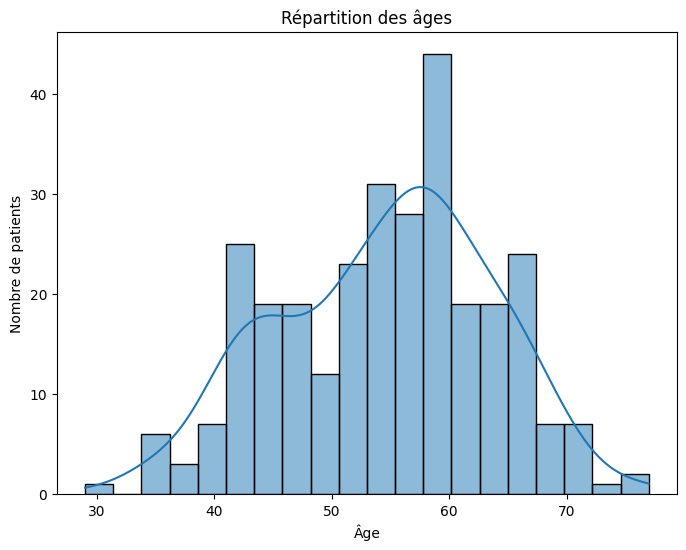

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(Heart_disease)

# Exemple : Histogramme d'âge
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Répartition des âges')
plt.xlabel('Âge')
plt.ylabel('Nombre de patients')
plt.show()


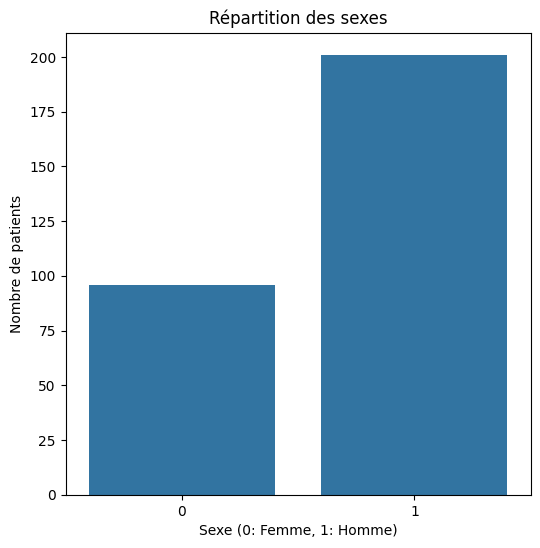

In [4]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='sex')
plt.title('Répartition des sexes')
plt.xlabel('Sexe (0: Femme, 1: Homme)')
plt.ylabel('Nombre de patients')
plt.show()

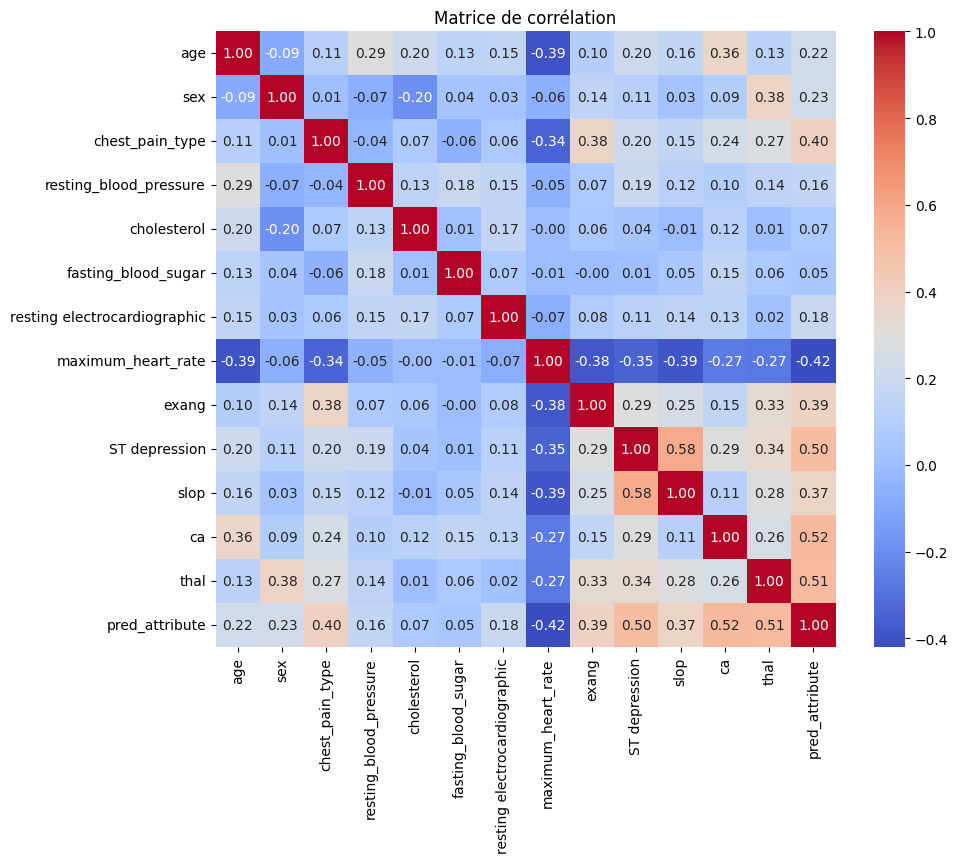

In [5]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = Heart_disease[['age','chest_pain_type','exang','ST depression','ca','thal']]
Y = Heart_disease['pred_attribute']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du modèle : {accuracy * 100:.2f}%\n")

# Autres métriques d'évaluation
print("Rapport de classification :\n", classification_report(y_test, predictions))
print("Matrice de confusion :\n", confusion_matrix(y_test, predictions))

Précision du modèle : 61.67%

Rapport de classification :
               precision    recall  f1-score   support

           0       0.87      0.94      0.91        36
           1       0.12      0.11      0.12         9
           2       0.00      0.00      0.00         5
           3       0.50      0.29      0.36         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.30      0.27      0.28        60
weighted avg       0.60      0.62      0.60        60

Matrice de confusion :
 [[34  2  0  0  0]
 [ 4  1  3  0  1]
 [ 0  4  0  0  1]
 [ 1  0  2  2  2]
 [ 0  1  0  2  0]]


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
X_test

,age,chest_pain_type,exang,ST depression,ca,thal
169,45,2,0,0.0,0,3
214,52,4,0,0.0,1,3
63,54,3,0,0.0,0,3
155,70,4,0,2.4,3,3
5,56,2,0,0.8,0,3
77,51,3,0,1.5,1,3
185,63,2,0,0.0,2,3
159,68,3,0,1.0,1,7
9,53,4,1,3.1,0,7
140,59,2,1,0.0,0,3


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres trouvés :", best_params)

# Évaluation du modèle avec les meilleurs hyperparamètres sur l'ensemble de test
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print(f"Précision sur l'ensemble de test : {accuracy * 100:.2f}%")



Meilleurs hyperparamètres trouvés : {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Précision sur l'ensemble de test : 63.33%


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Modèle Random Forest
rf = RandomForestClassifier()

# Grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres trouvés :", best_params)

# Évaluation du modèle avec les meilleurs hyperparamètres sur l'ensemble de test
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Précision sur l'ensemble de test : {accuracy * 100:.2f}%")


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Création du modèle SVM (initialisation avec des valeurs par défaut)
svm = SVC()

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Demande à l'utilisateur de saisir les valeurs pour créer de nouvelles données
new_data = []
for column in X.columns:
    value = float(input(f"Entrez la valeur pour la caractéristique '{column}' : "))
    new_data.append(value)

# Normalisation des nouvelles données
new_data_scaled = scaler.transform([new_data])

# Entraînement du modèle SVM sur l'ensemble de données original
svm.fit(X_scaled, Y)

# Prédiction avec le modèle SVM utilisant les données saisies par l'utilisateur
prediction = svm.predict(new_data_scaled)
if prediction[0] == 0:
    print("Vous avez peu de chance d'avoir une pathologie cardiovasculaire 🥳, toutefois je ne suis fiable qu'à 60 % donc consultez quand même un spécialiste")
else:
    print("‼️ Attention vous êtes à risque de développer des pathologies cardiovasculaires, nous invitons à consulter un spécialiste")

‼️ Attention vous êtes à risque de développer des pathologies cardiovasculaires, nous invitons à consulter un spécialiste


c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
Heart_disease['pred_attribute'].dtype

dtype('int64')